# Gradient Descent

Finding the minima of general functions re1s an extremely important task in many use cases of applied mathematics. The most notable example comes in the field of Machine Learning, where, in general, we start with set of training observations, $X$ along with a response variable $y$ and we try to find a Machine Learning model, which is just a function $f(X, \theta)$ depending on certain parameters $\theta$, that tries to approximate $y$ as best as possible.

These are known as **supervised** problems, because we have a set of true responses, $y$ for our training data. The task here is to find the parameters $\theta$ that minimize our 'error', which is the difference between $f(X,\theta)$ and $y$ (in the literature, this error is computed with an extra function called a **loss function**). As you can see, minimizing the error function is crucial to train a meaningful Machine Learning model. And this is only an example of the need to minimize a target function, there are other fields such as Finance or Economics where minima localization algorithms are needed.

So, finding function minima seems to be very important, but, how to we find these minima for functions in general? If you recall from Calculus the local minima of a function are attained where the gradient of this function equals zero. In practice this is not the only option, and we can count with a clever algorithm to find these minima, called **Gradient Descent**. We will study the basics of this algorithm and its variants in this section, as well as provide some examples of how to apply it.

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/gradient.png" alt="gradient" style="width:400px; margin:auto;"/>

## Useful links
Here are some extra resources you can find in the web that talk about this topic. \
*These links are external and we don't take responsibility for any downtime or incovenient caused by them.*

- [Utah Gradient Descent notes](https://users.cs.utah.edu/~jeffp/IDABook/T6-GD.pdf)
- [Real Python: Stochastic Gradient Descent Algorithm With Python and NumPy](https://realpython.com/gradient-descent-algorithm-python/)
- [Stat Quest Gradient Descent](https://www.youtube.com/watch?v=sDv4f4s2SB8)

## Let's review the theory

### Gradient review

You have a real-valued function $f: \mathbb{R}^n \to \mathbb{R}$ (possibly multivariate), and you want an $x_0 \in \mathbb{R}^n$ which is a local minimum of $f(x)$. This means that there is a neighborhood $B_{\epsilon}(x)$ in which $f(x)$ attains a minimum at $x_0$. For example, in the next figure, we use $f(x)=x^3-3x^2+2x-1$ and we can see that the approximate point $(1.577, -1.385)$ is a local minima of $f(x)$, because is a minimum in the neighborhood $]1,2[$ (highlighted in yellow).

Note that this point is not a *global* minimum of this function, that is, is not the point at which $f(x)$ has a minimal value overall, because $f(x)$ decreases as $x$ moves to $-\infty$. We are interested in finding *local* minima for the problem that concerns us today. If a point is a global minimum, then it is also, trivially, a local minimum as well.

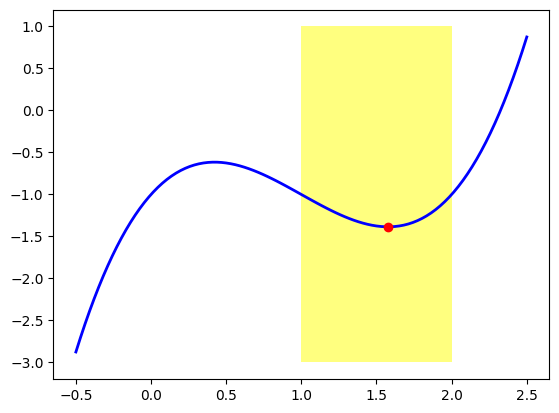

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

xx = np.linspace(-0.5, 2.5, 100)
fx = [x**3 -3*x**2 +2*x -1 for x in xx]

ax = plt.gca()
rect = Rectangle((1,-3), 1, 4, fc='yellow', alpha=0.5)
ax.add_patch(rect)

plt.plot(xx, fx, linewidth=2, color='b')
plt.plot(1.577, -1.385, "or")
plt.show()

Now, how to we find this point? As we saw in Calculus 101 at college, we can compute the gradient of $f(x)$ and find points at which this gradient is zero. Remember that for a differentiable function $f:\mathbb{R}^n \to \mathbb{R}$, its gradient is given by the vector

$
\nabla f(x) = \left( \frac{\partial f}{\partial x_1}, \cdots, \frac{\partial f}{\partial x_n}\right),
$

formed by the partial derivatives of $f(x)$. In $n=1$ dimensions, this is just the derivative $\nabla f(x) = f'(x)$. 

For our example, we know that $f'(x)=3x^2 -6x +2$.

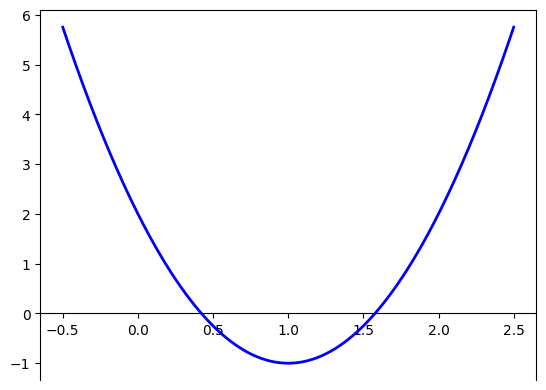

In [2]:
xx = np.linspace(-0.5, 2.5, 200)

def my_func(x):
    return x**3 - 3*x**2 + 2*x - 1

def my_gradient(x):
    # The derivative of this function:
    return 3*x**2 - 6*x + 2

fx = [my_func(x) for x in xx]

# We find the gradient:
gradfx = [my_gradient(x) for x in xx]

# get the axis 
ax = plt.gca()
# enforce placement of x-axis at y=0
ax.spines['bottom'].set_position('zero')
# We plot it:
plt.plot(xx, gradfx, linewidth=2, color='b')
plt.show()

To find the minima we look for we could find the zeros of this gradient by any other numerical method.
For example, we can use the Newton-Raphson method, which, if you recall, is a way to approximate the zeros of a differentiable function.
You can read more about it [here](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html). We 1 the code for this method and apply it to find a zero of $f'(x)$.

In [3]:
def newton_raphson(my_func, my_gradient, x0, tol, maxiter):

    x = x0
    f_val = my_func(x)
    k = 0
    
    while k < maxiter:

        f_val = my_func(x)
        gradient_val = my_gradient(x)
        
        if np.abs(f_val) < tol:
            break

        x = x - f_val/gradient_val
        k += 1

    return x

def my_gradient2(x):
    # Second derivative of f
    return 6*x - 6

nr_approx_ = newton_raphson(my_gradient, my_gradient2, x0=2, tol=0.001, maxiter=1000)

print(f'Newton-Raphson approximation of the minimum point: {nr_approx_}')

Newton-Raphson approximation of the minimum point: 1.5773809523809526


This gives an approximation to our point of $x=1.577$. Note that we have to find the zeros of $f'(x)$, so we pass $f'(x)$ as the primary function to the Newton-Raphson method, and its derivative $f''(x)$ as the gradient in this method.

*Note* the initialization point is important in the Newton-Raphson. If we used `x0=0` for example, we would get the other zero of $f'(x)$ which is approximately `0.42`. A way to deal with the uncertainty of choosing the initial point would be to perform a *random initialization*, where you select various initial points at random distributed over the domain of your function and you compare the results obtained by each iteration and select the most appropiate one.

This is an option to find the local minima of $f$, and it is sort of a *naive* approach, because it follows the textbook definition of local minima to find points that satisfy this definition. But, is there another approach? Something perhaps more *clever*? 🤔

There is actually, it is named *gradient descent* and gives us a nice and clean approximation method for finding our desired minima.
Let's review the basic principle behind it in the following section.

### Gradient descent algorithm

There's a common [analogy](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=An%20analogy%20for%20understanding%20gradient%20descent,-Fog%20in%20the&text=Persons%20are%20stuck%20in%20the,information%20to%20find%20the%20minimum.) to understand the gradient descent method: 

*Image you find yourself at a mountanous terrain, blindfolded -and you are not able to remove this blindfold from your face- and you desire to get to a valley within this landscape, that is to a plain, bottom-like place. Assuming there are no obstacles in your way, how would you do that? You could follow this recipe: feel the ground sorrounding you, move in the direction that has the steepest slope downwards, at this new location do the same and move again, continue this way until you arrive at a valley, where all directions arround you have no significant slope downwards.*

This sounds to us perhaps too evident, but it is the basic principle behind the gradient descent algorithm to find minima of functions. The mountanous terrain in this case is the graph of our function, and the valley we look for is the desired local minimum of our function.

The gradient descent algorithms starts with a specified point $x_0$, then finds the direction of greatest slope downwards arround this point and moves a step in that direction to arrive to another point $x_1$, and then repeats the same process again and again until convergence. Eventually, it is expected that the algorithm will arrive at a 'valley': a point that really has no downwards steep directions, this point should be a local minimum of the function we are using. 

A nice approach, right? 😃

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/walk_down_hill.jpg" alt="gradient" style="width:400px; margin:auto;"/>

*Note*
These type of algorithms are called **iterative algorithms** because they involve constructing a sequence of points that converges to a desired point.

It is well known from multivariate calculus, that the direction of the steepest slope of a function arround a point is given by $\nabla f$, the gradient of $f$. Therefore, this is the direction used to update our points in the sequence that will converge to the desired local minimum. In pseudo-code, this algorithm looks like this:

Gradient Descent ($\nabla f$, $x_0$, $\alpha$, $\tau$):

$
\begin{align*}
& \text{Set } k=0, \\
& \text{while } ||\nabla f(x_k) || \geq \tau: \\
& \quad x_{k+1} := x_k - \alpha \nabla f(x_{k}) \\
& \text{return } x_k
\end{align*}
$

In one variable, this is very simple and is just a matter of updating by the derivative of $f(x)$, so it would look like this:

$
\begin{align*}
& \text{Set } k=0, \\
& \text{while } |f'(x_k)| \geq \tau: \\
& \quad x_{k+1} := x_k - \alpha f'(x_{k}) \\
& \text{return } x_k
\end{align*}
$

Some comments:
1. The initial point $x_0$ used to start the algorithm needs to be provided. We will talk about random initial point selection techniques below, and about the impact of this selection in the algorithm performance.
2. The value of $\alpha$ is known as the **learning rate** and it controls how strongly should be our movement at each step. You could move just a little bit in the direction of steepest descent, or be more bold and move more agressively! This parameter is very influential on the speed and overall results of the gradient descent process. We will discuss about this down below.
3. The $\tau$ parameter is the **tolerance**, the algorithm will stop when the gradient has a norm or absolute value less than this tolerance. This tells us to stop because we have arrived at a point that has a gradient that is close to zero, so this might be our local minimum point. Other conditions can be placed, for example surpassing a maximum number of iterations.

Let's see how this algorithm behaves with our example function $f(x)=x^3-3x^2+2x-1$ from above. We will perform the iteration, store the values of $x_0, x_1,x_2, \cdots$ and plot them to see how the process becomes closer our minimum point target.

In [4]:
# Basic Gradient descent algorithm
def gradient_descent(gradient_func, x_0, alpha, tol, maxiter):
    """
    Gradient descent algorithm function.
    args:
    gradient_func: gradient function.
    x_0: starting point.
    alpha: learning rate.
    tol: tolerance for gradient.
    maxiter: maximum number of iterations allowed.
    returns:
    sequence values of gradient descent algorithm.
    """

    sequence_vals = [x_0]
    x = x_0
    k = 0

    while k < maxiter: # stopping condition
        gradient_val = gradient_func(x) # update the value of the gradient at the latest point
        if np.abs(gradient_val) < tol:
            break # get out of the loop if the norm of the gradient is smaller than the tolerance
        
        x = x - alpha*gradient_val # update the value of x with the previous val
        sequence_vals.append(x) # append the new point to the sequence
        k += 1 # update the number of iterations that have taken place so far

    return sequence_vals

# Example of gradient descent with our basic 1D function
seq_vals = gradient_descent(my_gradient, x_0=0.5, alpha=0.1, tol=0.001, maxiter=100)
print(len(seq_vals)) # This took 30 iterations

30


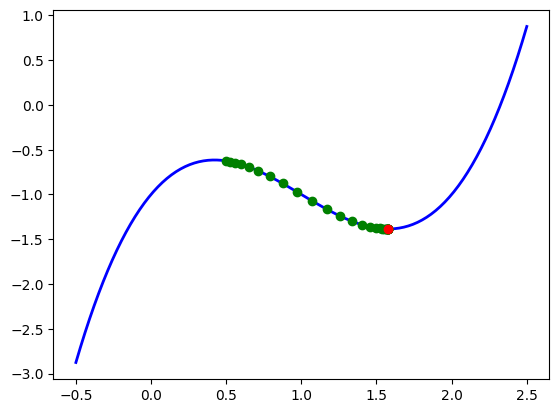

In [5]:
xx = np.linspace(-0.5, 2.5, 100)
fx = [my_func(x) for x in xx]
plt.plot(xx, fx, linewidth=2, color='b')

for val in seq_vals:
    plt.plot(val, my_func(val), "og")
plt.plot(1.577, -1.385, "or")
plt.show()

Ww have plotted our sequence $\{x_k\}$ and we see that with each iteration their values seem to approach our desired local minimum. Yay! 
Let's see an example with a multivariate function. For this case we will take $f(x,y)= - \text{exp}[-((x-1)^2 + (y-1)^2)] + \text{exp}[-((x-1)^2 + y^2)]$ which has a local minimum at $(1,1)$.

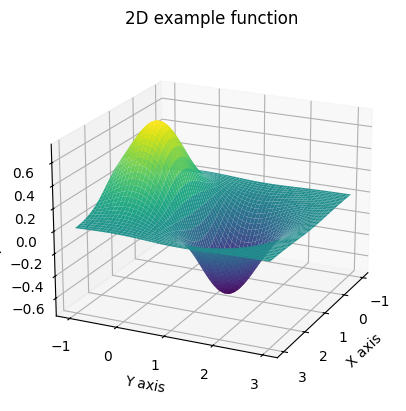

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def my_func2(x, y):
    return -np.exp(-((x-1)**2 + (y-1)**2)) + np.exp(-((x-1)**2 + (y-0)**2))

# Generate the data
x = np.linspace(-1, 3, 400)
y = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x, y)
z = my_func2(x, y)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("2D example function")

# Rotate the plot
ax.view_init(elev=20, azim=25)  # Adjust the elevation and azimuthal angles as needed

# Show the plot
plt.show()

In this case 

$
\begin{align*}
\nabla f = \biggl( 2(x-1) \bigl(\text{exp}[-((x-1)^2 + (y-1)^2)] - \text{exp}[-((x-1)^2 + y^2)] \bigr), \\
2(y-1)\cdot\text{exp}[-((x-1)^2 + (y-1)^2)] - 2y\cdot\text{exp}[-((x-1)^2 + y^2)] \biggr)
\end{align*}
$

In [7]:
def my_gradient2(xx):
    x = xx[0]
    y = xx[1]
    return np.array([
        2*(x-1)*(np.exp(-((x-1)**2 + (y-1)**2)) - np.exp(-((x-1)**2 + (y-0)**2))),
        2*(y-1)*np.exp(-((x-1)**2 + (y-1)**2)) - 2*y*np.exp(-((x-1)**2 + (y-0)**2))
    ])

In [8]:
# Let's do a small change to the gradient_descent function to compute the norm of the gradient:
def abs_val(val):
    if isinstance(val, np.ndarray):
        return np.linalg.norm(val)
    else:
        return np.abs(val)

# Basic Gradient descent algorithm
def gradient_descent(gradient_func, x_0, alpha, tol, maxiter):
    """
    Gradient descent algorithm function.
    args:
    gradient_func: gradient function.
    x_0: starting point.
    alpha: learning rate.
    tol: tolerance for gradient.
    maxiter: maximum number of iterations allowed.
    returns:
    sequence values of gradient descent algorithm.
    """

    sequence_vals = [x_0]
    x = x_0
    k = 0
    while k < maxiter: # stopping condition
        gradient_val = gradient_func(x) # update the value of the gradient at the latest point
        if abs_val(gradient_val) < tol:
            break # get out of the loop if the norm of the gradient is smaller than the tolerance

        x = x - alpha*gradient_val # update the value of x with the previous val
        sequence_vals.append(x) # append the new point to the sequence
        k += 1 # update the number of iterations that have taken place so far

    return sequence_vals

seq_vals2 = gradient_descent(my_gradient2, x_0=np.array([0,0]), alpha=0.1, tol=0.001, maxiter=100)
print(len(seq_vals2))

96


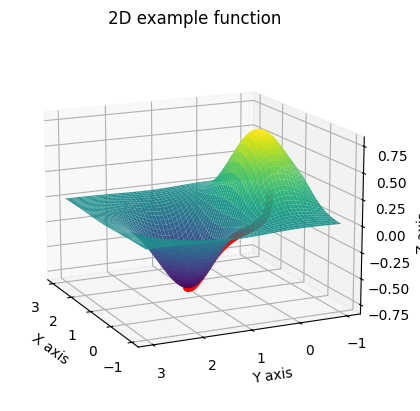

In [9]:
# Let's plot these values:

# Generate the data
x = np.linspace(-1, 3, 400)
y = np.linspace(-1, 3, 400)
x, y = np.meshgrid(x, y)
z = my_func2(x, y)

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add a scatter with the points from the sequence from the gradient descent function:
seq_vals2_x = [val[0] for val in seq_vals2]
seq_vals2_y = [val[1] for val in seq_vals2]
seq_vals2_z = [my_func2(val[0], val[1]) for val in seq_vals2]

ax.scatter(seq_vals2_x, seq_vals2_y, seq_vals2_z, c='r', marker='o')

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title("2D example function")

# Rotate the plot
ax.view_init(elev=15, azim=155)  # Adjust the elevation and azimuthal angles as needed

# Show the plot
plt.show()

The sequence of red points converges to the local minimum of this function, as we expected.
Hopefully these examples show you the advantage of this iterative method, and how it can provide us with a clean way of arriving to these local minima.

However, this is not the end of the story, and there's a lot we can say about the importance of the hyperparameters in the gradient descent performance.

### Learning rate and other inconveniences

With the gradient descent method there are two main parameters that impact the model's performance and accuracy: the learning rate and the initialization point. Let's discuss the learning rate first.

Note that the learning rate tells you how 'extreme' is your movement at each iteration. Clearly, if you move just a little bit from where you currently are, it will take more steps to get where you want to be. If you take a higher risk and make a larger movement, you might arrive quickly at the local minima destination. 

See what happens in this example where we reduced the learning rate.

101


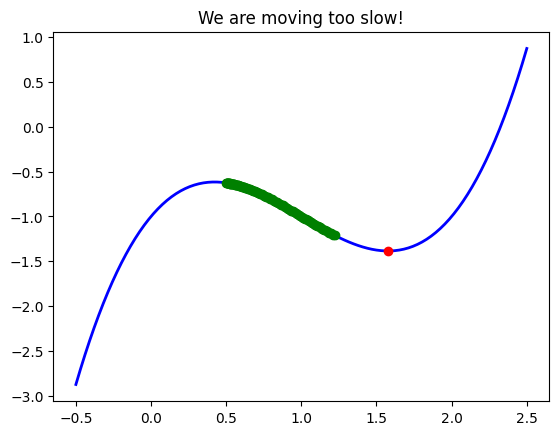

In [10]:
seq_vals = gradient_descent(my_gradient, x_0=0.5, alpha=0.01, tol=0.001, maxiter=100)
print(len(seq_vals))

xx = np.linspace(-0.5, 2.5, 100)
fx = [my_func(x) for x in xx]
plt.plot(xx, fx, linewidth=2, color='b')

for val in seq_vals:
    plt.plot(val, my_func(val), "og")
plt.plot(1.577, -1.385, "or")
plt.title('We are moving too slow!')
plt.show()

If we use a smaller learning rate, say $\alpha=0.01$, se see that after 100 iterations we are still nowhere near our minimum. This is because our algorithm is taking a smaller step at each iteration, and naturally it will take longer to converge.

Increasing the learning rate can be beneficial to boost the speed of the gradient descent algorithm, however having too high learning rates can yield unstable behaviors. Taking too big steps can make the sequence to explode in some cases. See below what happens if we put $\alpha=0.9$ in our base example.

In [11]:
from pprint import pprint
seq_vals = gradient_descent(my_gradient, x_0=0.5, alpha=0.9, tol=0.001, maxiter=18)
pprint(seq_vals)

[0.5,
 0.725,
 1.4208124999999994,
 1.842687967578126,
 0.8253558386855544,
 1.643004264366244,
 1.426677157584672,
 1.8351329862124273,
 0.852025803630195,
 1.6929056240937128,
 1.2965864735618278,
 1.9590849255522582,
 0.37550641061399226,
 0.2225273540165993,
 -0.5095246771649625,
 -5.76191950478392,
 -128.3155190555624,
 -45278.174884301276,
 -5535595208.423361]


This serves an an example of the needed caution with the learning rate determination and the tradeoff between stability and performance when selecting this parameter. There are many heuristics and recommended practices to provide a meaningful learning rate for each minimization problem. If you are planning on tuning learning rate parameters in deep learning (an area where gradient descent is a crucial tool for optimization), you can select different methods that update the learning rate adaptively, read [this article](https://medium.com/thedeephub/learning-rate-and-its-strategies-in-neural-network-training-270a91ea0e5c) for example.

Another parameter of sensitivity for this model is the initialization point. Naturally if you were to start moving at a place that is already close to a local minimum you will land in this local minimum, even if the function has a global minimum somewhere else in the distance. The location of your starting point can greatly determine your final convergence point. On this note we remark that the gradient descent algorithm is made to find *local minima* of functions, and it does not guarantee that your minima will be global. You have to make some extra work to try to confirm if your point is a global minimum or not.

See the example below with a function that has two local minima (one being global). When changing the initial points to be closer than these minima the algorithm converges to each point accordingly.

*Note:* Remember, in practice you don't know where your minima are! If you put an initial point, the algorithm most likely will converge to the closer minimum found to that initial point. We will talk about ways to set initial points down below.

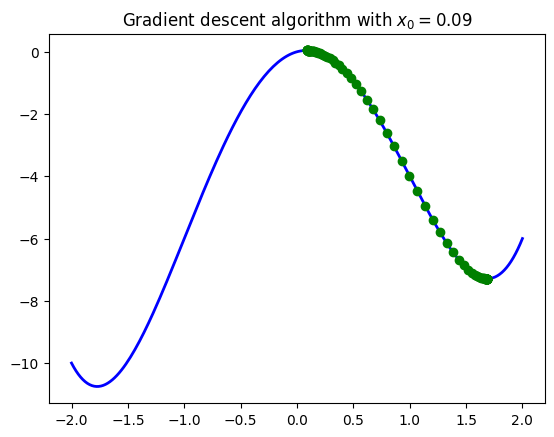

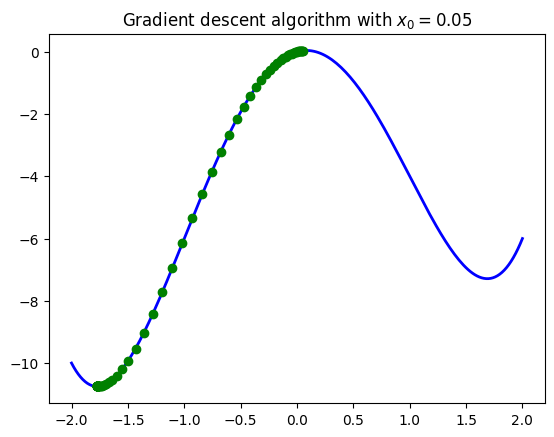

In [12]:
def my_func_2(x):
    return x**4-6*x**2+x

def my_gradient_2(x):
    return 4*x**3-12*x+1

seq_vals_A = gradient_descent(my_gradient_2, x_0=0.09, alpha=0.01, tol=0.001, maxiter=500)
xx = np.linspace(-2, 2, 200)
fx = [my_func_2(x) for x in xx]
plt.plot(xx, fx, linewidth=2, color='b')
for val in seq_vals_A:
    plt.plot(val, my_func_2(val), "og")
plt.title(r'Gradient descent algorithm with $x_0=0.09$')
plt.show()

seq_vals_B = gradient_descent(my_gradient_2, x_0=0.05, alpha=0.01, tol=0.001, maxiter=500)
xx = np.linspace(-2, 2, 200)
fx = [my_func_2(x) for x in xx]
plt.plot(xx, fx, linewidth=2, color='b')
for val in seq_vals_B:
    plt.plot(val, my_func_2(val), "og")
plt.title(r'Gradient descent algorithm with $x_0=0.05$')
plt.show()

A strategy commonly used to solve this problem is to perform the algorithm with several random initialization points and just try to figure out the global minimum from the results. We encourage you to try to come up with a function to do this using the gradient descent algorithm.

*Note:* If you are familiar with deep learning topics, random initialization is also a method to start the optimization process for a neural network. The idea is to randomly assign weights to each node of the network and use this as an initial point. This is just basically creating a random initial point for the gradient descent algorithm that will be applied over the network to optimize these weights. Read more about this [in here](https://machinelearningmastery.com/why-initialize-a-neural-network-with-random-weights/).

So, gradient descent seems like a nice, simple and clever option to find local minima of functions. Let's see how this algorithm is applied in the field of Machine Learning, to find optimized parameters for prediction models.

## Applications and examples

The main application of gradient descent, as we mentioned in our introduction, is to find optimal model parameters, for Machine Learning models. These parameters are found using the training data that serves as a basis for the model fit.

As usual, we have a series of training observations $X=(x^1, x^2, \cdots, x^n)$ where each $x^i \in \mathbb{R}^p$ is an observation of $p$ variables. We also have a response variable $y = (y_1, \cdots y_n)$ where each $y_i \in \mathbb{R}$. For *Regression* problems the values of $y$ are continuous, whereas for *Classification* problems, the values of $y$ are discrete $(0,1,2,...)$ and limited to a finite set of possibilities.

A Machine Learning model is a function $F(x, \theta)$ that takes as an input an observation $x\in \mathbb{R}^p$, applies a certain formula or algorithm using parameters $\theta \in \mathbb{R}^N$ and returns a response $\hat{y}$. The idea is that this $F$ is *trained* using the data $(X,y)$, learns the intrinsic relationships between $X$ and $y$ and then predicts responses for new values of $x$ based on its learning.

For example, *simple linear regression* proposes a linear formula $F(x, \theta)=\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p$ (where $x_j$ is the $j-$th entry of $x \in \mathbb{R}^p$). For *simple logistic regression*, in the binary case where $y_i \in \{0,1\}$, the algorithm proposes to compute the probability that the response $y$ equals $1$ for $x$ using $\theta$, that is $h(x. \theta) = P(y=1|x,\theta)$,  with a sigmoid function

$$
h(x, \theta) = \frac{1}{1+ \exp(-(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_p x_p))}
$$

And come to a prediction using

$$
F(x,\theta) = \begin{cases}
1 & \text{if } h(x, \theta) \geq 0.5 \\
0 & \text{otherwise}. \\
\end{cases}
$$

*The 0.5 value can be substituted for another threshold, clearly. This is a calibration step in the logistic regression approach.* \
Other models might propose more complex formulas and algorithms.


The main question posed at proposing such models is **what is the best selection of the $\theta$ parameter(s)?**. Because we want our function to capture as best possible the behavior of the training data $(X,y)$ we usually propose something called a **Loss Function**, which is used to measure how close is the response of the function $F(X, \theta)$ to the values of $y$ in our training data.

Basically the Loss Function, $L$, just performs a difference between the real values $y$ and the function/model values $F(X,y)$. There are many ways of defining a Loss Function. One approach is to use the mean squared error function:

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n (F(x^i, \theta) - y_i)^2. \quad (1)
$$
Note that this depends on $\theta$, all the other inputs $x_i, y_i$ are fixed (they come from our data problem). Another example is to take the mean absolute error loss function, like this:
$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n |F(x^i, \theta) - y_i|. \quad (2)
$$

For simple regression the mean squared error loss function looks like this:
$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n \Bigl(\theta_0 + \sum_{j=1}^p \theta_j x_j^i - y_i \Bigr)^2. \quad (3)
$$

For Classification problems, there's a special loss function that has the following form

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n -y_i \log(h(x^i, \theta)) - (1-y_i)\log(1-h(x^i, \theta)). \quad (4)
$$

*Note: what is this?!* This function has an intuitive explanation if we take a look at the functions $-\log(z)$ and $-\log(1-z)$. Note that if $y=1$ and $h(x, \theta)$ is close to $1$, then $-\log(h(x, \theta)$ is small, and thus the error would be small, which makes sense because $y=1$ should give that $P(y=1|x, \theta)$ must be close to $1$. But if $h(x, \theta)$ is close to $0$, then $-\log(h(x, \theta)$ goes to infinity, thus increasing the error (or loss). An analogous situation happens when $y=0$ and with the function $-log(1-h(x,\theta))$.

<img src="https://jimmycalvomonge.github.io/appmathpython/_static/logz.png" alt="gradient" style="width:400px; margin:auto;"/>

Now that we have the concept of a **Loss Function**, our overall task in order to fit a model to the data (which is the same as to find the best parameters $\theta$) is to *minimize* the function $L(\theta)$: we need to find $\theta_0$ that makes $L$ a minimum. In other words we need to find local minima of $L$.

How do we do that? Well with Gradient Descent of course! As long as our loss function is differentiable, we can apply this algorithm to find the optimal $\theta$.

**Note:** The differential part is very important. Remember the Gradient Descent algorithm needs the gradient! For example, the mean absolute error loss function in equation (2) is not differentiable, so another numerical method needs to be used in this case to compute its minimum.

Let's take a look at how this algorithm works with both simple linear regression and simple logistic regression.

### Gradient descent for Linear Regression

In this case we have 

$$
L(\theta) = \frac{1}{n} \sum_{i=1}^n \Bigl(\theta_0 + \sum_{j=1}^p \theta_j x_j^i - y_i \Bigr)^2. \quad (3)
$$

So its gradient is given by

$$
\begin{align*}
&\frac{\partial L}{\partial \theta_0} = \frac{2}{n} \sum_{i=1}^n \Bigl(\theta_0 + \sum_{j=1}^p \theta_j x_j^i - y_i \Bigr) \\
&\frac{\partial L}{\partial \theta_k} = \frac{2}{n} \sum_{i=1}^n \Bigl(\theta_0 + \sum_{j=1}^p \theta_j x_j^i - y_i \Bigr)x^i_k \quad \text{for } k=1, \cdots, p.
\end{align*}
$$

That's it! We can apply our gradient descent function from before! 
To make things simple we change these to matrix notation. Note that


$$
\begin{align*}
&\frac{\partial L}{\partial \theta_0} = 2 \texttt{ mean} \bigl( \theta_0 + X\cdot (\theta_1, \cdots, \theta_p)^t - y \bigr) \\
&\frac{\partial L}{\partial \theta_k} = 2 \texttt{ mean} \bigl( \bigl( \theta_0 + X\cdot (\theta_1, \cdots, \theta_p)^t - y\bigr)*X[:,k] \bigr) \quad \text{for } k=1, \cdots, p,
\end{align*}
$$
where $X[:,k]$ is the $k$-th column of $X$ and $*$ is *pointwise* multiplication of vectors (just the symbol `*` represents in `numpy`).

*That was a clever trick to simplify computations* 😅

Let's use some data for a linear regression.
We use some sample data to compute the linear regression coefficients. We will be using the Multiple Linear Regression Dataset from Kaggle which is a very simple example of a dataframe with two variables `age` and `experience` and a response variable `income`. You can download it [here](https://www.kaggle.com/datasets/hussainnasirkhan/multiple-linear-regression-dataset).

In [13]:
import pandas as pd
data = pd.read_csv('./multiple_linear_regression_dataset.csv')
data.head(5)

age  experience  income
0   25           1   30450
1   30           3   35670
2   47           2   31580
3   32           5   40130
4   43          10   47830

In [14]:
X = data[['age', 'experience']].values
y = data['income'].values.reshape(X.shape[0],1)
n, p = X.shape
print(n, p)

20 2


We create our gradient function for the mean squared error Loss Function we discussed above. Note we are using the matrix notation from the formula.

In [15]:
def my_gradient_linear_regression(theta):
    n, p = X.shape
    theta0 = theta.reshape(p+1, 1)
    LDiff = theta[0] + np.dot(X, theta0[1:,]) - y
    dL0 = 2*np.mean(LDiff)
    return np.array([dL0]+ [2*np.mean(LDiff*X[:,k].reshape(n,1)) for k in range(p)])

We apply gradient descent now:

In [16]:
seq_vals = gradient_descent(my_gradient_linear_regression, x_0=np.array([100,100,100]), alpha=0.00055, tol=0.00001, maxiter=200000)
print(len(seq_vals))
seq_vals[-1]

200001


array([31261.40849967,   -99.18774173,  2162.39848474])

These are the values obtained for $\theta_0, \theta_1, \theta_2$ respectively. Note the parameters used for $\alpha$, the tolerance, the max number of iterations and the initial vector. It is difficult to find these and you might start trying other values and see errors or results that are strange. This is, as we mentioned above, one aspect of gradient descent where you need to be very careful.

Lets scompare our results to what the `Python` library `sklearn` and its `LinearRegression` method has to give us. We see that our approximation was pretty close (but remember the care of using an appropriate $\alpha$ and other parameters for gradient descent). 🤗

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

intercept: [31261.6898541]
slope: [[ -99.19535546 2162.40419192]]


### Gradient Descent for Logistic Regression

In this case we have

$$
L(\theta) = \frac{-1}{n} \sum_{i=1}^n y_i \log(h(x^i, \theta)) + (1-y_i)\log(1-h(x^i, \theta)). \quad (4)
$$

In this case it takes a little bit of effort but one can show that 

$$
\begin{align*}
& \frac{\partial L}{ \partial \theta_0} = \frac{1}{n}\sum_{i=1}^n (h(x^i, \theta) - y_i) \\
& \frac{\partial L}{ \partial \theta_k} = \frac{1}{n}\sum_{i=1}^n (h(x^i, \theta) - y_i)x_k^i \quad \text{for } k=1, \cdots, p. \\
\end{align*}
$$

Which, in matrix notation would look like:

$$
\begin{align*}
& \frac{\partial L}{ \partial \theta_0} = \texttt{mean}\bigl( h(X, \theta) - y \bigr) \\
& \frac{\partial L}{ \partial \theta_k} = \texttt{mean}\biggl( \bigl(h(X, \theta) - y \bigr)*X[:, k]\biggr) \quad \text{for } k=1, \cdots, p. \\
\end{align*}
$$

To simplify this notation we can make a little aesthetical adjustment. If we add a column of ones to $X$ at the start then we obtain through linear algebra definitions that

$$
\nabla L(\theta) = \frac{1}{n} \cdot (h(X,\theta) - y) \cdot X.
$$

Which will prove much more easy to write in code as it is only a matrix multiplication.

Let's take a look at how gradient descent would work in this case. For this we will use a simple dataset, the iris dataset.

In [42]:
# First, let's define the data to use for our logistic regression example:

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X0 = iris["data"]
y1 = (iris["target"] == 0).astype(int) #return 1 if Iris Versicolor, else 0.
sc = StandardScaler()
X1 = sc.fit_transform(X0)
print(X1.shape)
print(y1.shape)

# Add a column of ones to X as we mentioned above
X1 = np.c_[np.ones(len(X1)), X1]
X1.shape

(150, 4)
(150,)


(150, 5)

We implement some utility functions, like the computation of the sigmoid, the gradient required and the loss function itself.

A nice tutorial that can help you understand this example is here: [Implement Logistic regression + gradient descent in python from scratch](https://github.com/ShankarPendse/ML_tutorials/blob/main/Logistic_regression_from_scratch.ipynb)

In [49]:
def hh(theta, X):
    z = np.matmul(X, theta)
    predictions = 1/(1+np.exp(-z))
    return predictions

def my_gradient_logistic_regression(theta):
    n = len(y1)
    predictions = hh(theta, X1)
    errors = predictions - y1
    gradients = (1/n)*np.matmul(errors, X1)
    return gradients

def loss_function_logistic(X, y, theta):
    predictions = hh(theta, X)
    n = len(y)
    log_of_predictions = np.log(predictions)
    log_of_oneMinusPredictions = np.log(1-predictions)
    loss = -(1/n)*np.sum(((y*log_of_predictions) + ((1-y)*(log_of_oneMinusPredictions))))
    return loss

First, we fit the Logistic Regression with the `sklearn` library (as you can see it is really simple).

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X1, y1)
classifier.intercept_, classifier.coef_

(array([-2.49043954]),
 array([[ 0.00375612, -1.06618532,  1.22832555, -1.76097657, -1.63077804]]))

Now we try our own implementation with gradient descent.

In [51]:
seq_vals = gradient_descent(my_gradient_logistic_regression, x_0=np.array([0,0,0,0,1]),
                            alpha=7, tol=1e-9, maxiter=100000)
print(len(seq_vals))
seq_vals[-1]

100001


array([-8.73680088, -3.21555725,  5.78791633, -8.8777889 , -8.10002932])

You will notice that the coefficients are different. This might be due to our algorithm converging to another minimum, or not enough convergence speed. Bear in mind that the `sklearn` algorithms have been greatly optimized and they can use some modifications to improve their accuracy and speed.

Check these discussions about this issue: 
- https://stackoverflow.com/questions/66689157/why-does-my-own-implementation-of-logistic-regression-differ-from-sklearn
- https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082

Regardless of that, do note that applying the gradient descent actually aims to reduce the loss function, as we can see with the plot below.

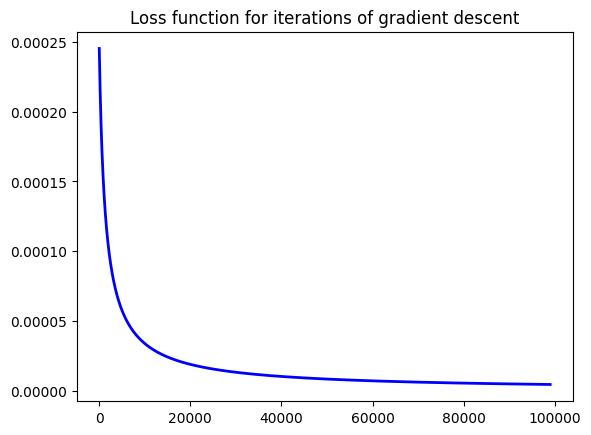

In [65]:
loss_ = [loss_function_logistic(X1, y1, theta) for theta in seq_vals]
plt.plot(loss_[1000:], linewidth=2, color='b') # Let's start with some values down the series to check convergence speed faster ...
plt.title('Loss function for iterations of gradient descent')
plt.show()

Feels nice to implement an algorithm from scratch doesn't it? Try this implementation with other examples and compare with the standard output of the `sklearn` library.

## Stochastic gradient descent

Now that you have understood gradient descent we encourage you to take a look at this video to see another issue that we may face with this algorithm, particularly with large amounts of data:

[Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI)

Watched the video? 🧐 Great! We can continue.

If you took a chance to run the previous code, you might have noticed that it took a couple of seconds (it wasn't an immediate result), specially in the case of the iris dataset. In our example for logistic regression we had 150 observations, and the formula
$$
\nabla L(\theta) = \frac{1}{n} \cdot (h(X,\theta) - y) \cdot X.
$$
computes a vector of 151 entries (plus $\theta_0$, the intercept of the sigmoid formula). What if we had a dataset with much larger sizes? In the scenario of big data, performing such computations with matrix multiplications can be [very expensive](https://era.ed.ac.uk/handle/1842/4734).

For this issue, a variant of gradient descent known as **Stochastic Gradient Descent** comes to the rescue. It not only attempts to solve this problem, but it has been noted that it is much faster in achieving convergence than the regular gradient descent method.

The basic idea behind this variation consists of not using all our our data points to perform the gradient adjustment at each iteration of gradient descent, but rather we would use a *random subset* of points. So for example, instead of using all rows of the matrix $X$ to compute $\nabla \theta_{k+1}$ at the $k$-th iteration we would use a subset of the rows of $X$, a subset chosen randmly (*stochastically*, in greek if you will).

This applies not only for Logistic Regression, but for any application of the gradient descent to optimizing prediction models based on training data $X$ (we just discussed Linear and Logistic Regression, for simplicity).

## Other variations, more algorithms

...